- 이미지에서 화소에 대해 처리 방법 2가지
  - 화소의 값 변경
    - 화소의 값만 변경: 전처리
    - 화소의 중심 영역을 변경: 영역처리
  - 화소의 위치 변경

### 정렬 인덱스 반환
- dst = cv2.randn(dst, mean, stddev)
  - dst: 난수의 출력 배열; 배열은 사전에 할당되어 있어야 하며 채널이 1~4개 있어야 함
  - mean: 생성된 난수의 평균값
  - stddev: 생성된 난수의 표준편차

- 주파수가 높다 &rarr; 변화량이 높다(선명함)
- 주파수가 낮다 &rarr; 변화량이 낮다

### 행렬 연산 함수
- cv2.gemm(src1, src2, alpha, src3,  beta[.dst[,flags]]]) $\to$ dst
  - 일반화된 행렬 곱셈을 수행
  - src1, src2: 행렬 곱을 위한 첫 번째와 두 번째 입력 행렬
  - alpha: src1^T $\times$ src2에 곱해질 스케일 값(가중치)
  - src3: 세 번째 입력 행렬(델타 행렬)
  - beta: src3에 곱해질 스케일 값(가중치)
  - dst: 출력 행렬
  - flags: 연산 플래그 - 옵션을 조합해 입력 행렬들을 전치(전치 옵션 등 설정)
    - cv2.GEMM_1_T: 값 = 1, src1을 전치
    - cv2.GEMM_2_T: 값 = 2, src2를 전치
    - cv2.GEMM_3_T: 값 = 4, src3을 전치
  - 회전 변환<br>
    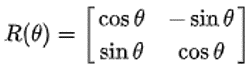

In [1]:
import numpy as np, cv2

src1 = np.array([1,2,3,1,2,3], np.float32).reshape(2,3)
src2 = np.array([1,2,3,4,5,6], np.float32).reshape(2,3)
src3 = np.array([1,2,1,2,1,2], np.float32).reshape(3,2)
alpha, beta = 1.0, 1.0

dst1 = cv2.gemm(src1, src2, alpha, None, beta, flags=cv2.GEMM_1_T)
dst2 = cv2.gemm(src1, src2, alpha, None, beta, flags=cv2.GEMM_2_T)
dst3 = cv2.gemm(src1, src3, alpha, None, beta)

titles = ['src1', 'src1', 'src1', 'dst1', 'dst2', 'dst3']
for title in titles:
    print("[%s] = \n%s\n" % (title, eval(title)))

[src1] = 
[[1. 2. 3.]
 [1. 2. 3.]]

[src1] = 
[[1. 2. 3.]
 [1. 2. 3.]]

[src1] = 
[[1. 2. 3.]
 [1. 2. 3.]]

[dst1] = 
[[ 5.  7.  9.]
 [10. 14. 18.]
 [15. 21. 27.]]

[dst2] = 
[[14. 32.]
 [14. 32.]]

[dst3] = 
[[ 6. 12.]
 [ 6. 12.]]



In [2]:
import numpy as np, cv2

theta = 20 * np.pi / 180
rot_mat = np.array([ [np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)] ], np.float32)

pts1 = np.array([ (250, 30), (400, 70),
                  (350, 250), (150, 200)], np.float32)
pts2 = cv2.gemm(pts1, rot_mat, 1, None, 1, flags=cv2.GEMM_2_T)

for i, (pt1, pt2) in enumerate(zip(pts1, pts2)):
    print("pts1[%d] = %s, pst2[%d] = %s" %(i, pt1, i, pt2))

image = np.full((400, 500, 3), 255, np.uint8)
cv2.polylines(image, [np.int32(pts1)], True, (0, 255, 0), 2)
cv2.polylines(image, [np.int32(pts2)], True, (255, 0, 0), 3)
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

pts1[0] = [250.  30.], pst2[0] = [224.66255  113.695816]
pts1[1] = [400.  70.], pst2[1] = [351.93564 202.58655]
pts1[2] = [350. 250.], pst2[2] = [243.38737 354.63022]
pts1[3] = [150. 200.], pst2[3] = [ 72.54986 239.24155]


- 연습문제 풀어보기

## 화소 처리
- 화소(pixel): Picture Element
- 영상처리
  - 2차원 데이터에 대한 행렬 연산
    - 2차원 배열 처리
    - OpenCV
      - Class Mat(C++) &rarr; numpy.ndarray(파이썬)   
- 영상처리 프로그래밍을 한다는 것
  - 영상이라는 2차원 데이터의 원소값을 개발자가 원하는 방향으로 변경하는 것
  - 영상을 다루려면 기본적으로 영상의 화소 접근, 값 수정, 새로 만들 수 있어야 함

In [3]:
import numpy as np, cv2, time

def pixel_access1(image):
    image1 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i,j]                  # 화소 접근
            image1[i, j] =  255 - pixel            # 화소 할당
    return image1

def pixel_access2(image):
    image2 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image.item(i, j)  # 화소 접근
            # image2.itemset((i, j),  255 - pixel)  # 화소 할당
            image2[i, j] =  255 - pixel
    return image2

def pixel_access3(image):
    lut = [255 - i for i in range(256)]  # 룩업테이블 생성
    lut = np.array(lut, np.uint8)
    #image3 = lut[image] #numpy.ndarray 사용
    image3=cv2.LUT(image, lut)
    return image3

def pixel_access4(image):
    image4 = cv2.subtract(255, image) # 브로드캐스팅 사용
    return image4

def pixel_access5(image):
    image5 = 255 - image
    return image5

image = cv2.imread("images/bright.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류 발생")

# 수행시간 체크
def time_check(func, msg):
    start_time = time.perf_counter()
    ret_img = func(image)
    elapsed = (time.perf_counter() - start_time) * 1000
    print(msg, "수행시간 : %.2f ms" % elapsed)
    return ret_img

image1 = time_check(pixel_access1, "[방법 1] 직접 접근 방식")
image2 = time_check(pixel_access2, "[방법 2] item() 함수 방식")
image3 = time_check(pixel_access3, "[방법 3] 룩업 테이블 방식")
image4 = time_check(pixel_access4, "[방법 4] OpenCV 함수 방식")
image5 = time_check(pixel_access5, "[방법 5] ndarray 연산 방식")

# 결과 영상 보기
cv2.imshow("image  - original", image)
cv2.imshow("image1 - directly access to pixel", image1)
cv2.imshow("image2 - item()/itemset()", image2)
cv2.imshow("image3 - LUT", image3)
cv2.imshow("image4 - OpenCV", image4)
cv2.imshow("image5 - ndarray 방식", image5)
cv2.waitKey(0)
cv2.destroyAllWindows()

[방법 1] 직접 접근 방식 수행시간 : 86.98 ms
[방법 2] item() 함수 방식 수행시간 : 57.83 ms
[방법 3] 룩업 테이블 방식 수행시간 : 0.73 ms
[방법 4] OpenCV 함수 방식 수행시간 : 0.29 ms
[방법 5] ndarray 연산 방식 수행시간 : 0.54 ms


### 화소 밝기 변환
- 흑백 영상: 검은색과 흰색으로 구성된 영상을 의미
- 단일 채널의 영상 = 그레이 스케일 영상(명암도 영상)


In [4]:
import numpy as np
import cv2

image1 = np.zeros((50, 512), np.uint8)
image2 = np.zeros((50, 512), np.uint8)
rows, cols = image1.shape[:2]

for i in range(rows):
    for j in range(cols):
        image1[i, j] = j // 2
        image2[i ,j] = (j // 20) * 10
        # image1.itemset((i, j), j // 2)
        # image2.itemset((i, j), j // 20*10)

cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 영상 밝기의 가감 연산
- opencv sturation 방식
  - 최대 255, 최소 0으로 제한
  - 넘어간 값은 버림
  - ex) 250 * 100 = 350 &rarr; 255
- numpy의 modulo 방식
  - unsigned int값(np.uint8): 0 ~ 255 사이의 값이 순환됨
  - ex) 255 + 100 = 355 % 256 $\to$ 104

In [5]:
import cv2

image = cv2.imread("images/bright.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

dst1 = cv2.add(image, 100)
dst2 = cv2.subtract(image, 100)

dst3 = image + 100
dst4 = image - 100

cv2.imshow("original image", image) # 원본
cv2.imshow("dst1- bright: OpenCV", dst1) # 원본 영상보다 밝게 나타남
cv2.imshow("dst2- dark: OpenCV", dst2) # 뺄셈: 원본 영상보다 어두워짐
cv2.imshow("dst3- bright: numpy", dst3) # modulo 방식 -> 의도치 않은 밝기로 지정
cv2.imshow("dst4- dark: numpy", dst4) # modulo 방식 -> 의도치 않은 밝기로 지정
cv2.waitKey(0)
cv2.destroyAllWindows()

### 행렬 덧셈 및 곱셈을 이용한 영상 합성
- 영상에 상수값 대신에 다른 영상을 빼면 $\to$ 영상 합성(synthesis)

- cv2.addWeighted(img1, alpha, img2, beta, gamma)
  - img1, img2: 합성할 두 영상
  - alpha: img1에 지정할 가중치
  - beta: img2에 지정할 가중치, 흔히 (1 - alpha) 적용
  - gamma: 연산 결과에 가감할 상수, 흔히 0(zero) 적용
  - $dst(I) = saturate(src1(I) \cdot alpha + src2(I) \cdot beta + gamma)$

In [6]:
import numpy as np, cv2

image1 = cv2.imread("images/add1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("images/add2.jpg", cv2.IMREAD_GRAYSCALE)
if image1 is None or image2 is None: raise Exception("영상파일 읽기 오류")

alpha, beta = 0.6, 0.7
add_img1 = cv2.add(image1, image2)
print('add_img1: ', add_img1.dtype)
add_img2 = cv2.add(image1 * alpha, image2 * beta)
print('add_img2: ', add_img2.dtype)
add_img2 = np.clip(add_img2, 0, 255).astype("uint8")
add_img3 = cv2.addWeighted(image1, alpha, image2, beta, 0)
print('add_img3: ', add_img3.dtype)

titles=['image1', 'image2', 'add_img1', 'add_img2', 'add_img3']
for t in titles: cv2.imshow(t, eval(t))
cv2.waitKey(0)
cv2.destroyAllWindows()

add_img1:  uint8
add_img2:  float64
add_img3:  uint8


- 0.6 + 0.7 - 0.3: 밝기를 깍는 것
- 0.6&rarr;0.45, 0.7&rarr;0.55: 비율 자체를 정규화하는 것

## 명암
### 대비(contrast)
- 두 이미지에서 밝기의 뚜렷한 차이를 뜻함(교재 내용 참고 X; 왜곡된 표현)
- 같은 밝기의 색이라도 인접한 색의 밝기에 따라서 다르게 보임(눈의 착시 현상)

- 일반적으로 contrast가 높은 이미지 &rarr; 선명한 이미지라 인식 &rarr; 좋은 이미지

In [7]:
import numpy as np, cv2
import matplotlib.pyplot as plt

img1 = np.full((300, 300), 70, np.uint8)
img2 = np.full((300, 300), 230, np.uint8)

img1[100:200, 100:200] = 150
img2[100:200, 100:200] = 150

for i in range(100, 300, 100):
    img1[i:i+5,:] = 255
    img1[:,i:i+5] = 255
    img2[i:i+5,:] = 255
    img2[:,i:i+5] = 255

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

- 화소의 절대밝기보다는 상대적인 밝기값이 중요함

- cv2.scaleAdd(src1, alpha, src2[,dst])
  - src1, src2:: 합성할 두 영상
  - alpha: src에 지정할 축적 비율(scale)
  - dst: 출력할 영상
  - $dst(I) = alpha \cdot src1(I) + src2(I)$

### 영상 대비 변경

In [8]:
import numpy as np, cv2

image = cv2.imread("images/contrast.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

noimage = np.zeros(image.shape[:2], image.dtype)
avg = cv2.mean(image)[0]/2.0
print('average: ', avg)

dst1 = cv2.scaleAdd(image, 0.5, noimage)
dst2 = cv2.scaleAdd(image, 2.0, noimage)
dst3 = cv2.addWeighted(image, 0.5, noimage, 0, avg)
dst4 = cv2.addWeighted(image, 2.0, noimage, 0, -avg)

cv2.imshow("image", image)
cv2.imshow("dst1 - decrease contrast", dst1)
cv2.imshow("dst2 - increase contrast", dst2)
cv2.imshow("dst3 - decrease contrast using average", dst3)
cv2.imshow("dst4 - increase contrast", dst4)
cv2.waitKey(0)
cv2.destroyAllWindows()

average:  68.54403935185185


### 히스토그램
- 관측값의 개수를 겹치지 않는 다양한 계급(bin)으로 표시하는 것
- 어떤 데이터가 얼마나 많은지를 나타내는 도수 분포표를 그래프로 나타낸 것
- 히스토그램은 왼쪽 위가 (0, 0)이기 때문에 그린 후 뒤집어서 그림
- 리스트로 감싸야 함

- hist = numpy.calcHist(img, channel, mask, histSize, ranges[, hist[, accumulate]])
  - img: 입력 영상, [img] 형태로 리스트로 감싸서 표현
  - channel: 처리할 채널, 리스트로 감싸서 표현
    - 1채널: [0], 2채널: [0, 1], 3채널: [0, 1, 2]
  - mask: 마스크에 지정한 픽셀만 히스토그램 계산
  - histSize: 계급(bin)의 개수, 채널 개수에 맞게 리스트로 표현
  - ranges: 각 픽셀의 가질 수 있는 값의 범위, RGB인 경우[0,256] 리스트로 표현
  - hist: 출력 히스토그램
  - accmulate: 누적 플래그 - 여러 배열에서 단일 히스토그램을 구할 때 사용

In [9]:
import numpy as np, cv2
def calc_histo(image, histSize, ranges=[0,256]):
    hist = np.zeros((histSize, 1), np.float32)
    gap = ranges[1] / histSize

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            idx = int(image.item(i, j)/gap)
            hist[idx] += 1
    return hist

image = cv2.imread("images/pixel.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

histSize, ranges = [32], [0,256]
gap = ranges[1]/histSize[0]
ranges_gap=np.arange(0, ranges[1]+1, gap)
hist1 = calc_histo(image, histSize[0], ranges)
hist2 = cv2.calcHist([image], [0], None, histSize, ranges)
hist3, bins = np.histogram(image, ranges_gap)

print("User 함수: \n", hist1.flatten())
print("OpenCV 함수: \n", hist2.flatten())
print("numpy 함수: \n", hist3)

User 함수: 
 [  97.  247.  563. 1001. 1401. 1575. 1724. 1951. 2853. 3939. 3250. 2549.
 2467. 2507. 2402. 2418. 2727. 3203. 3410. 3161. 2985. 2590. 3384. 4312.
 4764. 3489. 2802. 2238. 1127.  628.  199.   37.]
OpenCV 함수: 
 [  97.  247.  563. 1001. 1401. 1575. 1724. 1951. 2853. 3939. 3250. 2549.
 2467. 2507. 2402. 2418. 2727. 3203. 3410. 3161. 2985. 2590. 3384. 4312.
 4764. 3489. 2802. 2238. 1127.  628.  199.   37.]
numpy 함수: 
 [  97  247  563 1001 1401 1575 1724 1951 2853 3939 3250 2549 2467 2507
 2402 2418 2727 3203 3410 3161 2985 2590 3384 4312 4764 3489 2802 2238
 1127  628  199   37]


- hist = numpy.histogram(a, bins=10, range=None, destory=None, weights=None)
  - 주어진 데이터셋의 히스토그램을 계산함
  - a: 입력 데이터, 1차원 배열로 계산됨
  - bins: 계급값(bin)의 개수. 정수, 배열, 문자열
    - 정수: 동일 간격으로 bins 개수만큼 계급값을 정의
    - 배열: 주어진 배열 원소값 크기만큼의 간격으로 비균일하게 계급값을 정의
    - 문자열: 계급값을 정의하는 방법을 나타냄
      - 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'
    - range: 계급값의 범위(float, float)
      - default: (a.min(), a.max())
    - destory: False이면 bin의 샘플수가 결과값이 되고, True이면 bin의 정규화된 확률밀도함수값이 됨
    - weight: a와 같은 크기의 가중치 배열
- numpy에도 이미지 히스토그램을 그릴 수 있음
- 조금 더 효율적임
- 디폴트 값이 최대와 최소임
- density는 bool 값을 줘도 되고 안줘도 됨

In [13]:
import numpy as np, cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX) # MINMAX, L1, L2, INF
    gap=hist_img.shape[1]/hist.shape[0]

    for i, h in enumerate(hist):
        x=int(round(i*gap))
        w=int(round(gap))
        cv2.rectangle(hist_img, (x, 0, w, int(h)), 0, cv2.FILLED)
    return cv2.flip(hist_img, 0)

image = cv2.imread("images/pixel.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

hist = cv2.calcHist([image], [0], None, [32], [0, 256])
# hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_img = draw_histo(hist)

cv2.imshow("image", image)
cv2.imshow("histo_img", hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\legna\AppData\Local\Temp\ipykernel_5612\4026352889.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.rectangle(hist_img, (x, 0, w, int(h)), 0, cv2.FILLED)


- dst = cv2.normalize(src, dst, alpha, beta, type_flag)
  - src: 노멀라이즈 이전 데이터
  - dst: 노멀라이즈 이후 데이터
  - alpha: 노멀라이즈 구간 1
  - betaL 노멀라이즈 구간2, 구간 노멀라이즈가 아닌 겨웅 사용 안함
  - type_flag: 알고리즘 선택 플래그 상수
    - cv2.NORM_MINMAX: alpha와 beta 구간으로 노멀라이즈
    - cv2.NORM_L1: 전체 합으로 나누기, alpha = 노멀라이즈 전체 합
    - cv2.NORM_L2: 단위 벡터(uint vector)로 노멀라이즈
    - cv2.NORM_INF: 최대 값으로 나누기

- matplotlib도 사용 가능함

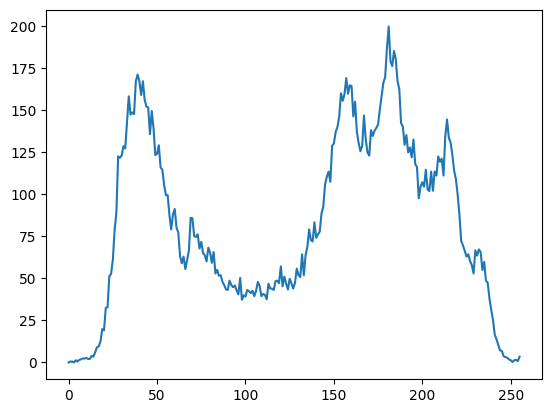

In [15]:
import numpy as np, cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/draw_hist.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류")

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
cv2.normalize(hist, hist, 0, 200, cv2.NORM_MINMAX)
plt.plot(hist)
plt.show()

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컬러 히스토그램 그리기
- 하나의 그래프 안에 rgb값을 보여줌
- 한 개 안에 rgb를 따로 보여줌

In [6]:
import numpy as np, cv2

def make_palette(rows):
    hue = [round(i*180/rows) for i in range(rows)]
    hsv = [[[h, 255, 255]] for h in hue]
    hsv = np.array(hsv, np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def draw_hist_hue(hist, shape=(200,256,3)):
    hsv_palette = make_palette(hist.shape[0])
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)

    gap = hist_img.shape[1] / hist.shape[0]
    for i, h in enumerate(hist):
        x, w = int(round(i*gap)), int(round(gap))
        color=tuple(map(int, hsv_palette[i][0]))
        cv2.rectangle(hist_img, (x,0,w,int(h)), color, cv2.FILLED)
    return cv2.flip(hist_img, 0)

image = cv2.imread("images/hue_hist.jpg", cv2.IMREAD_COLOR)
if image is None: raise Exception("영상 파일 읽기 오류")

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue_hist = cv2.calcHist([hsv_img], [0], None, [18], [0,180])
hue_hist_img = draw_hist_hue(hue_hist, (200, 360, 3))

cv2.imshow("image", image)
cv2.imshow("hue_hist_img", hue_hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\legna\AppData\Local\Temp\ipykernel_16648\161312298.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.rectangle(hist_img, (x,0,w,int(h)), color, cv2.FILLED)
